<a href="https://colab.research.google.com/github/NAGPALADITI14/Data_Mining/blob/main/DataPreprocessingAndFeatureSelection(9and10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Heart_health.csv'
df=pd.read_csv(file_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ID             Name  Age  Gender  Height(cm)  Weight(kg)  \
0   1         John Doe   45    Male         175          80   
1   2       Jane Smith   35  Female         160          65   
2   3  Michael Johnson   55    Male         180          85   
3   4      Sarah Brown   40  Female         165          70   
4   5        David Lee   50    Male         170          75   

  Blood Pressure(mmHg)  Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  \
0               120/80                 200              90     No   
1               110/70                 180              80     No   
2               130/85                 220              95    Yes   
3               115/75                 190              85     No   
4               125/80                 210              92    Yes   

   Exercise(hours/week)  Heart Attack  
0                     3             0

In [ ]:
import warnings
warnings.filterwarnings("ignore")

drop_cols = ['ID','Name']
df=df.drop(columns=[col for col in drop_cols if col in df.columns],errors='ignore')

from sklearn.preprocessing import MinMaxScaler,StandardScaler,Binarizer,LabelEncoder
label_encoder ={}
for col in ['Gender','Smoker']:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoder[col]=le

df['Blood Pressure(mmHg)'] = df['Blood Pressure(mmHg)'].astype(str).str.split('/').str[0].astype(float)

# **Step 4: Scaling (Min-Max Normalization)**
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df_scaled.iloc[:, :-1])

# **Step 5: Standardization (Z-score Normalization)**
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized.iloc[:, :-1] = standard_scaler.fit_transform(df_standardized.iloc[:, :-1])

# **Step 6: Binarization (Thresholding)**
binarizer = Binarizer(threshold=100)
df_binarized = df.copy()
df_binarized['Cholesterol(mg/dL)'] = binarizer.fit_transform(df[['Cholesterol(mg/dL)']])

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.iloc[:, :-1] = scaler.fit_transform(df_normalized.iloc[:, :-1])

print("Original DataFrame:\n", df)
print("\nMin-Max Scaled DataFrame:\n", df_scaled)
print("\nStandardized DataFrame:\n", df_standardized)
print("\nBinarized DataFrame:\n", df_binarized)
print("\nNormalized DataFrame:\n", df_normalized)

Original DataFrame:
      Age  Gender  Height(cm)  Weight(kg)  Blood Pressure(mmHg)  \
0     45       1         175          80                 120.0   
1     35       0         160          65                 110.0   
2     55       1         180          85                 130.0   
3     40       0         165          70                 115.0   
4     50       1         170          75                 125.0   
..   ...     ...         ...         ...                   ...   
719   39       0         166          68                 118.0   
720   56       1         179          83                 123.0   
721   43       0         167          70                 120.0   
722   53       1         182          86                 125.0   
723   47       0         170          73                 121.0   

     Cholesterol(mg/dL)  Glucose(mg/dL)  Smoker  Exercise(hours/week)  \
0                   200              90       0                     3   
1                   180              80 

# **lab10**

In [ ]:
df.head()

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,45,1,175,80,120.0,200,90,0,3,0
1,35,0,160,65,110.0,180,80,0,2,0
2,55,1,180,85,130.0,220,95,1,4,1
3,40,0,165,70,115.0,190,85,0,3,0
4,50,1,170,75,125.0,210,92,1,2,1


In [ ]:
#Filter Methods

# chi square test
from sklearn.feature_selection import SelectPercentile,chi2
selector = SelectPercentile(chi2,percentile=40)

X=df.drop(columns=['Heart Attack'])
y=df['Heart Attack']

X_new=selector.fit_transform(X,y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

Selected features: ['Age', 'Gender', 'Weight(kg)', 'Cholesterol(mg/dL)']


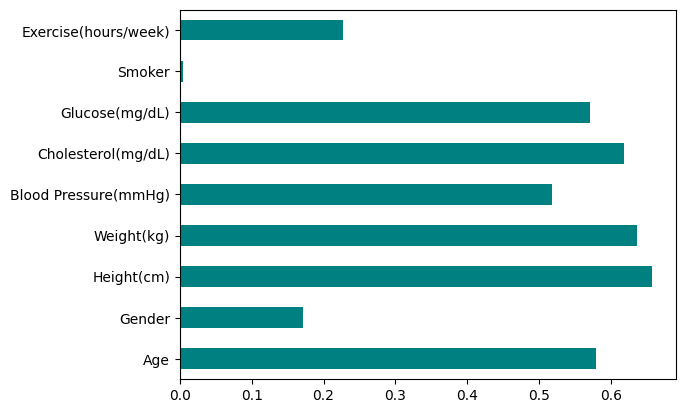

In [ ]:
# Information gain

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importance = mutual_info_classif(X,y)
feature_imp = pd.Series(importance,df.columns[0:len(df.columns)-1])
feature_imp.plot(kind='barh',color='teal')
plt.show()

1. Forward selection
In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a p-value of individual features less than the significance level.

In short, the steps for the forward selection technique are as follows :

Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.

Fit all possible models with one extra feature added to the previously selected feature(s).

Again, select the feature with a minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process



Ordinary least squares (OLS) regression is an optimization strategy used in linear regression models that finds a straight line that fits as close as possible to the data points, in order to help estimate the relationship between a dependent variable and one or more independent variables.

In [ ]:
import pandas as pd
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.3):
    if target.name in data.columns:
        data = data.drop(columns=[target.name])

    initial_features = data.columns.tolist()
    best_features = []

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)

        for new_col in remaining_features:
            try:
                model = sm.OLS(target, sm.add_constant(data[best_features + [new_col]])).fit()
                pvals = model.pvalues
                # Use get() to avoid KeyError
                new_pval[new_col] = pvals.get(new_col, 1.0)
            except Exception as e:
                print(f"Error processing {new_col}: {e}")
                new_pval[new_col] = 1.0  # Assign high p-value to skip feature

        min_p_value = new_pval.min()

        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break

    return best_features


In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Blood Pressure(mmHg)',
       'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker',
       'Exercise(hours/week)', 'Heart Attack'],
      dtype='object')


In [ ]:
#Wrapper methods

print("X columns:", X.columns.tolist())
print("y name:", y.name)

import statsmodels.api as sm
X = df.drop(columns=['Heart Attack'])
y = df['Heart Attack']
print(df.columns)
print("After dropping")
print(X.columns)
selected = forward_selection(X,y)
print("Selected features:", selected)

X columns: ['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Blood Pressure(mmHg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)']
y name: Heart Attack
Index(['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Blood Pressure(mmHg)',
       'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker',
       'Exercise(hours/week)', 'Heart Attack'],
      dtype='object')
After dropping
Index(['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Blood Pressure(mmHg)',
       'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker',
       'Exercise(hours/week)'],
      dtype='object')
Selected features: ['Cholesterol(mg/dL)', 'Exercise(hours/week)', 'Blood Pressure(mmHg)', 'Weight(kg)', 'Height(cm)', 'Glucose(mg/dL)', 'Smoker', 'Gender']


In [ ]:
# Recursive Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

feature_names = ['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Blood Pressure(mmHg)',
                 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)']


estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=6)
selector = selector.fit(X, y)

selected_features = [name for name, selected in zip(feature_names, selector.support_) if selected]

print("✅ Top 5 Selected Features for Heart Attack Prediction:")
for i, feature in enumerate(selected_features, start=1):
    print(f"{i}. {feature}")


✅ Top 5 Selected Features for Heart Attack Prediction:
1. Age
2. Gender
3. Height(cm)
4. Weight(kg)


<Axes: >

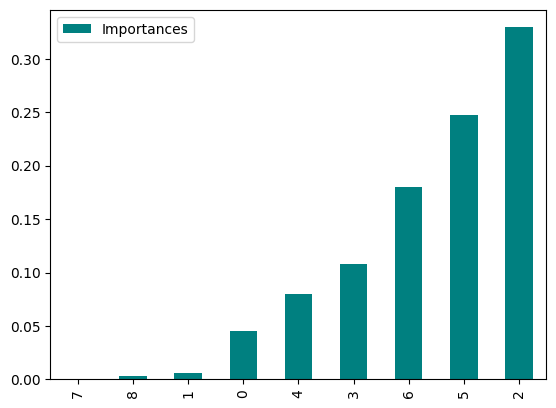

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)

model.fit(X, y)

importances = model.feature_importances_

final_df = pd.DataFrame({'Features': pd.DataFrame(X).columns, 'Importances': importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances')

final_df.plot.bar(color='teal')